# <span style='color:pink'> pakiety matematyczne - projekt  </span>
## <span style='color:pink'> Funkcja DFT.FREQ (tydzień 2)  </span>

In [1]:
using WAV
using FFTW

Na dzień dobry lecimy z tym ptaszkiem

In [2]:
bird = wavread("bird_sound.wav")

([0.0018616290780358287 0.0032349620044557024; -0.0006103701895199438 0.0005493331705679495; … ; 0.0017090365306558428 -0.0008239997558519242; 0.001281777397991882 -0.0004882961516159551], 22050.0f0, 0x0010, WAVChunk[WAVChunk(Symbol("fmt "), UInt8[0x10, 0x00, 0x00, 0x00, 0x01, 0x00, 0x02, 0x00, 0x22, 0x56, 0x00, 0x00, 0x88, 0x58, 0x01, 0x00, 0x04, 0x00, 0x10, 0x00]), WAVChunk(:LIST, UInt8[0x49, 0x4e, 0x46, 0x4f, 0x49, 0x41, 0x52, 0x54, 0x10, 0x00  …  0x35, 0x38, 0x2e, 0x34, 0x35, 0x2e, 0x31, 0x30, 0x30, 0x00])])

To teraz zaczynamy z fftfreq (nie umiem użyć helpa z Julii w Jupyterze :c)

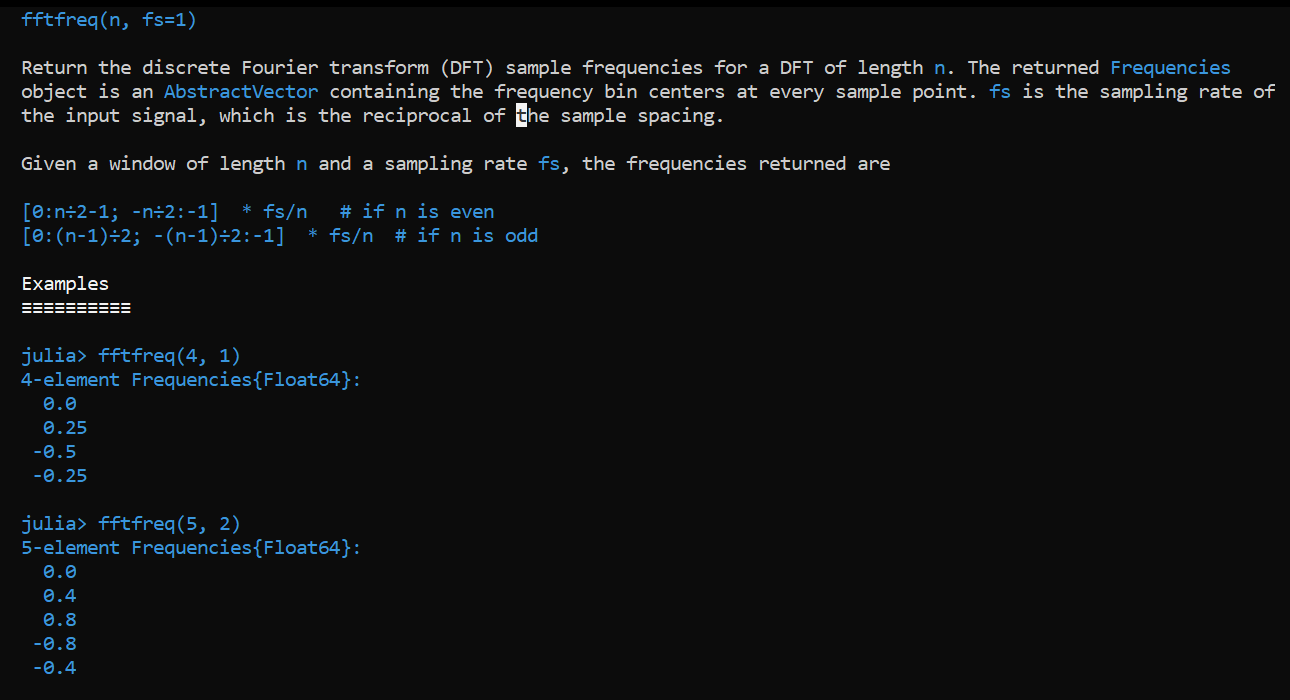

Nasze własne dftfreq :D

In [3]:
function dftfreq(n, fs) #n-window length, fs-sample spacing (cokolwiek to jeszcze znaczy)
    if n >= 1
        f = zeros(n)
        if iseven(n)
            positive = collect(0:((n/2)-1))
            negative = collect((-n/2):1:(-1))
        else isodd(N)
            positive = collect(0:((n-1)/2))
            negative = collect((-(n-1)/2):1:(-1))
        end
        len = length(positive)
        f[1:len] = positive
        f[(len + 1):end] = negative
        return f*fs/n
    else
        throw(ArgumentError("n powinno być większe równe 1"))
    end
end

dftfreq (generic function with 1 method)

Przyjmijmy sobie, że fs = 1

In [4]:
N = length(bird[1][:,1])

166896

In [5]:
fft_freq = fftfreq(N, 1)
dft_freq = dftfreq(N, 1)
isapprox(fft_freq, dft_freq)

true

Spróbujmy jeszcze dla jakiś innych

In [6]:
isapprox(fftfreq(10, 7), dftfreq(10, 7))

true

In [7]:
isapprox(fftfreq(14567, 0.6), dftfreq(14567, 0.6))

true

In [8]:
isapprox(fftfreq(98764, 9), dftfreq(98764, 9))

true

In [9]:
fftfreq(0, 0.6)

LoadError: [91mArgumentError: Condition 1 ≤ n_nonnegative ≤ n isn't satisfied.[39m

In [10]:
dftfreq(0, 0.6)

LoadError: [91mArgumentError: n powinno być większe równe 1[39m

Chyba jest okej :D

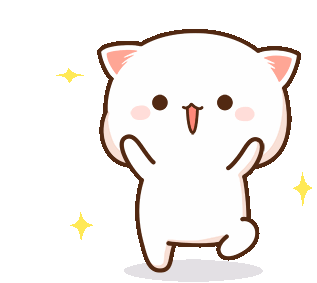